# Diagnosing Your Regression Model (Practice) [[Link]](https://login.codingdojo.com/m/376/12536/89755)


>## From Previous Practice Assigment:
><h3>Task: Run a linear regression with statsmodels predict the price of a car.</h3><p>Note: you will be revisiting this task for a later assignment, so you will want to create a new GitHub repository for your work.</p><ul><li>Dataset&nbsp;Link:&nbsp;&nbsp;<a href="https://www.kaggle.com/datasets/hellbuoy/car-price-prediction" target="_blank">https://www.kaggle.com/datasets/hellbuoy/car-price-prediction</a>&nbsp;<ul><li>&nbsp;Download and save in repo,</li></ul></li></ul><h2>Steps to Perform:</h2><ul><li>&nbsp; &nbsp; Perform initial preprocessing of data</li><li>&nbsp; &nbsp; Perform preprocessing for statsmodels</li><li>&nbsp; &nbsp; Run the model in statsmodels and produce a results summary</li><li>&nbsp; &nbsp; Evaluate the model on the test set</li></ul></div><p><br></p><p>Submit your assignment repository link.&nbsp;</p>
        
        
## This Assignment:
- Now that you've learned about the assumptions of Linear Regression and how to check them, revisit your model from the Linear Regression in statsmodles assignment and test if your regression meets the assumption.
    - In a markdown cell below your results, summarize what assumptions the model did and/or did not meet. 
- If you model did not meet the assumptions, then iterate on the model and add/change any preprocessing needed to improve its performance. 

Submit your GitHub respitory link with your work.



# SOLUTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
plt.style.use(['seaborn-muted','fivethirtyeight'])
## Standard Statsmodels import

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

plt.rcParams['figure.facecolor'] = 'white'
plt.style.use(['seaborn-talk'])

In [2]:
pd.set_option('display.max_columns',100)
df = pd.read_csv("Data/CarPrice_Assignment.csv", index_col=0)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [4]:
## Drop carNmae
df = df.drop(columns='CarName')


In [5]:
## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()


X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,,,
18,0,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20
40,0,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,54.1,2304,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
41,0,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,54.1,2372,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
48,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19
124,-1,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,59.8,2535,ohc,four,122,2bbl,3.35,3.46,8.5,88,5000,24,30


In [6]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)

## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)

## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False)
                        )

num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

preprocessor = make_column_transformer( (num_pipe, num_cols),
                                       (cat_pipe,cat_cols),
#                                        remainder='passthrough'
                                      )
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['symboling', 'wheelbase', 'carlength',
                                  'carwidth', 'carheight', 'curbweight',
                                  'enginesize', 'boreratio', 'stroke',
                                  'compressionratio', 'horsepower', 'peakrpm',
                                  'citympg', 'highwaympg']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                

In [7]:
## fit the col transformer to learn feature names 
preprocessor.fit(X_train)

## Now create list of our final features after preprocessing
final_features = []


## adding the numeric features which process first in the Col Trans
final_features.extend(num_cols)


## Now, get OHe feature names
cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)
final_features.extend(cat_features)


## Transform X vars and remake as dataframes
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                         columns=final_features, 
                         index=X_train.index)

X_test_tf = pd.DataFrame( preprocessor.transform(X_test), 
                         columns=final_features, 
                         index=X_test.index)
X_train_tf.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,0.0,110.0,197.0,70.9,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40,0.0,96.5,175.4,65.2,54.1,2304.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,0.0,96.5,175.4,62.5,54.1,2372.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,0.0,113.0,199.6,69.6,52.8,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
124,-1.0,103.3,174.6,64.6,59.8,2535.0,122.0,3.35,3.46,8.5,88.0,5000.0,24.0,30.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### NOTE TO TAs: there is an error here that students may run into

- `sm.add_constant` checks for ANY column that already has a single value (is constant), and if it there is one, it doesn't add anything.
- A sparse one hot encoded feature MAY wind up being a constant value in the training data. 
    - To fix this error, add `has_constant='add'` to sm.add_constant and run the model again

## Baseline Model (from Previous Assignment)

In [8]:
X_train_df = sm.add_constant(X_train_tf, has_constant='add', prepend=False)
X_test_df = sm.add_constant(X_test_tf, has_constant='add', prepend=False)

In [9]:
## Fit OLS Model 
model = sm.OLS(y_train,X_train_df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     38.91
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.59e-49
Time:                        19:23:31   Log-Likelihood:                -1379.1
No. Observations:                 153   AIC:                             2840.
Df Residuals:                     112   BIC:                             2965.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
symboling               109.1170    276.382      0.395      0.694    -438.499     656.733
wheelbase                10.2840    126.328      0.081      0.935    -240.019     260.587
carlength               -35.9765     59.571     -0.604      0.547    -154.008      82.055
carwidth                662.2655    295.996      2.237      0.027      75.787    1248.744
carheight                94.8147    167.784      0.565      0.573    -237.629     427.258
curbweight                2.6479      2.067      1.281      0.203      -1.447       6.743
enginesize              120.0677     30.004      4.002      0.000      60.619     179.516
boreratio              1542.5308   2066.498      0.746      0.457   -2551.970    5637.032
stroke                -5548.9926   1180.916     -4.699      0.000   -7888.826   -3209.160
compressionratio      -1041.9097    652.432     -1.597      0.113   -2334.619     250.800
horsepower               -4.4570     26.863     -0.166      0.869     -57.682      48.768
peakrpm                   2.8627      0.800      3.577      0.001       1.277       4.448
citympg                -127.0956    180.118     -0.706      0.482    -483.976     229.785
highwaympg              158.5982    162.218      0.978      0.330    -162.816     480.012
fueltype_diesel        2378.2546   3522.002      0.675      0.501   -4600.141    9356.650
fueltype_gas          -1.087e+04   3184.575     -3.415      0.001   -1.72e+04   -4564.962
aspiration_std        -5339.1580   2097.483     -2.546      0.012   -9495.052   -1183.264
aspiration_turbo      -3157.3767   1974.510     -1.599      0.113   -7069.615     754.861
doornumber_four       -4296.3106   2043.350     -2.103      0.038   -8344.947    -247.674
doornumber_two        -4200.2241   1970.759     -2.131      0.035   -8105.031    -295.417
carbody_convertible     404.0059   1407.984      0.287      0.775   -2385.735    3193.746
carbody_hardtop       -1575.7735   1366.750     -1.153      0.251   -4283.813    1132.266
carbody_hatchback     -2780.5221    997.819     -2.787      0.006   -4757.572    -803.472
carbody_sedan         -1790.7554   1077.132     -1.663      0.099   -3924.955     343.444
carbody_wagon         -2753.4895   1324.994     -2.078      0.040   -5378.795    -128.184
drivewheel_4wd        -2712.1881   1459.567     -1.858      0.066   -5604.133     179.756
drivewheel_fwd        -2973.3956   1577.656     -1.885      0.062   -6099.318     152.527
drivewheel_rwd        -2810.9509   1517.121     -1.853      0.067   -5816.931     195.029
enginelocation_front  -8496.5346   3941.938     -2.155      0.033   -1.63e+04    -686.090
enginetype_dohc         513.1049   1380.817      0.372      0.711   -2222.807    3249.017
enginetype_dohcv      -7367.9573   4600.079     -1.602      0.112   -1.65e+04    1746.510
enginetype_l           

In [10]:
## To Evaluate on Test - Get Predicts
test_preds = result.predict(X_test_df)
test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'The testing r-square value is {test_r2:.2f} and the testing mean squared error is {test_mse:,.2f}.')


## To Evaluate on Test - Get Predicts
train_preds = result.predict(X_train_df)
train_r2 = r2_score(y_train, train_preds)
train_mse = mean_squared_error(y_train, train_preds)

print(f'The training r-square value is {train_r2:.2f} and the testing mean squared error is {train_mse:,.2f}.')


The testing r-square value is 0.94 and the testing mean squared error is 4,932,689.37.
The training r-square value is 0.93 and the testing mean squared error is 3,952,848.72.


### Diagnosing Residuals

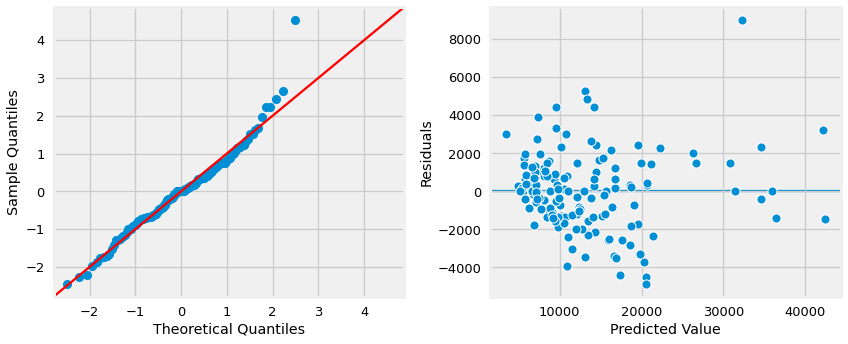

In [11]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
    
    
evaluate_ols(result,X_train_df, y_train)



- Our baseline model violates the assumption of homoscedasticity and normality of residuals (though only on one side of the distribution). 
- There are also bad p-values that need to be removed.

## Checking Regression Assumptions

In [12]:
## how many num cols to visualize?
len(num_cols)

14

In [13]:
sns.__version__

'0.11.2'

### Checking Linear Relationship

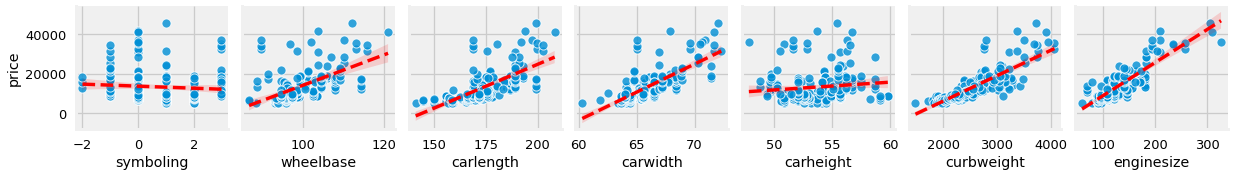

In [14]:
## Making a pairplot with regression lines (First 7 features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=num_cols[:7],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));



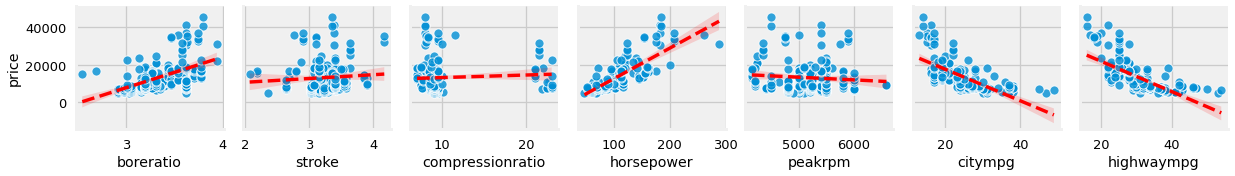

In [15]:
## Making a pairplot with regression lines (Last 7 features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=num_cols[7:],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

In [16]:
## which cols are nonlinear?
nonlin_cols = ['carheight','stroke','peakrpm']
df.drop(columns=nonlin_cols) ## will permanently drop when make new X

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,9.0,111,21,27,13495.0
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,9.0,111,21,27,16500.0
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,9.0,154,19,26,16500.0
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,10.0,102,24,30,13950.0
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,8.0,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,2952,ohc,four,141,mpfi,3.78,9.5,114,23,28,16845.0
202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,3049,ohc,four,141,mpfi,3.78,8.7,160,19,25,19045.0
203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,8.8,134,18,23,21485.0


### Checking No Multicollinearity

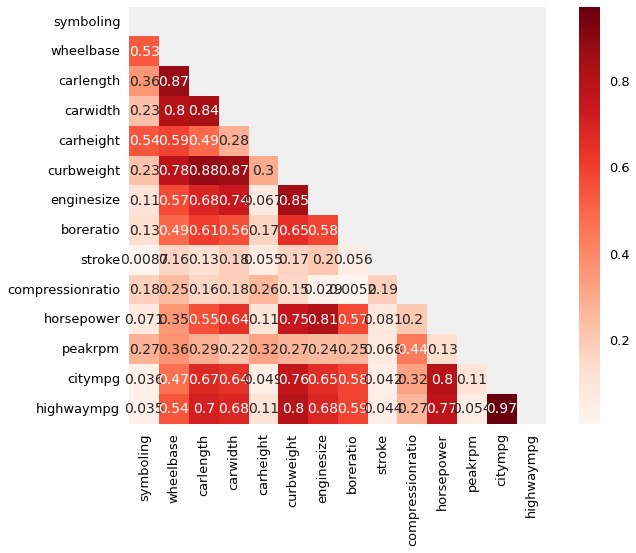

In [17]:
## Calculating the mask to hide the upper-right of the triangle
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

- mpg cols: 'highwaympg','citympg','carlength','carwidth'

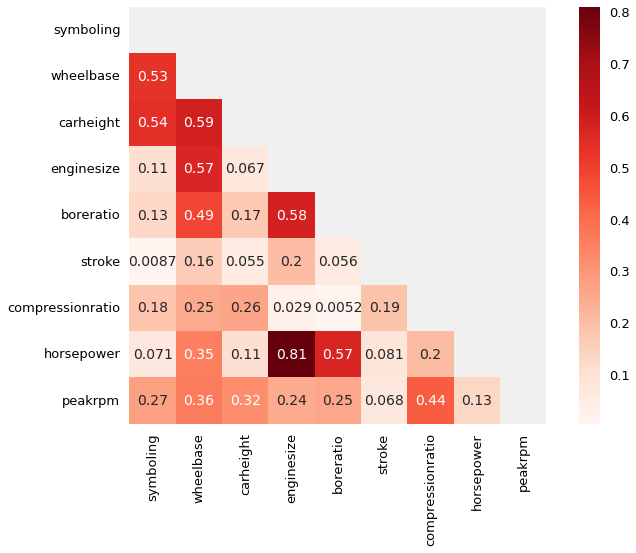

In [18]:
drop_cols = ['highwaympg','citympg','carlength','carwidth','curbweight']

corr = df.drop(columns=['price',*drop_cols]).corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

In [19]:
def get_train_test_data(X,y):

    X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=321)



    ## make cat selector and using it to save list of column names
    cat_select = make_column_selector(dtype_include='object')
    cat_cols = cat_select(X_train)

    ## make num selector and using it to save list of column names
    num_select = make_column_selector(dtype_include='number')
    num_cols = num_select(X_train)

    ## make pipelines
    cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                           fill_value='MISSING'),
                             OneHotEncoder(handle_unknown='ignore', sparse=False)
                            )

    num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

    preprocessor = make_column_transformer( (num_pipe, num_cols),
                                           (cat_pipe,cat_cols),
    #                                        remainder='passthrough'
                                          )

    ## fit the col transformer to learn feature names 
    preprocessor.fit(X_train)

    ## Now create list of our final features after preprocessing
    final_features = []


    ## adding the numeric features which process first in the Col Trans
    final_features.extend(num_cols)


    ## Now, get OHe feature names
    cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)
    final_features.extend(cat_features)


    ## Transform X vars and remake as dataframes
    X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                             columns=final_features, 
                             index=X_train.index)

    X_test_tf = pd.DataFrame( preprocessor.transform(X_test), 
                             columns=final_features, 
                             index=X_test.index)



    X_train_df = sm.add_constant(X_train_tf, has_constant='add', prepend=False)
    X_test_df = sm.add_constant(X_test_tf, has_constant='add', prepend=False)
    return X_train_df, y_train, X_test_df, y_test

In [20]:
## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price', *drop_cols, *nonlin_cols]).copy()

X_train_df,y_train, X_test_df, y_test =get_train_test_data(X,y)
X_train_df.head()

,symboling,wheelbase,enginesize,boreratio,compressionratio,horsepower,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,const
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,0.0,110.0,209.0,3.62,8.0,182.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
40,0.0,96.5,110.0,3.15,9.0,86.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,0.0,96.5,110.0,3.15,9.0,86.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48,0.0,113.0,258.0,3.63,8.1,176.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
124,-1.0,103.3,122.0,3.35,8.5,88.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     35.22
Date:                Sat, 07 May 2022   Prob (F-statistic):           5.09e-47
Time:                        19:23:32   Log-Likelihood:                -1406.7
No. Observations:                 153   AIC:                             2879.
Df Residuals:                     120   BIC:                             2979.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
symboling               246.7396    308.153      0.801      0.425    -363.383     856.862
wheelbase               233.1142    103.386      2.255      0.026      28.417     437.812
enginesize               61.6683     26.957      2.288      0.024       8.296     115.040
boreratio              -139.2460   2228.326     -0.062      0.950   -4551.176    4272.684
compressionratio        253.0656    682.942      0.371      0.712   -1099.111    1605.242
horsepower               86.1450     25.569      3.369      0.001      35.521     136.769
fueltype_diesel       -2383.2827   3814.135     -0.625      0.533   -9935.005    5168.440
fueltype_gas          -3855.7754   2274.290     -1.695      0.093   -8358.712     647.161
aspiration_std        -3518.1684   1591.259     -2.211      0.029   -6668.750    -367.587
aspiration_turbo      -2720.8897   1508.742     -1.803      0.074   -5708.094     266.314
doornumber_four       -3218.0848   1611.655     -1.997      0.048   -6409.050     -27.120
doornumber_two        -3020.9733   1398.915     -2.160      0.033   -5790.728    -251.219
carbody_convertible    2984.7042   1364.640      2.187      0.031     282.812    5686.596
carbody_hardtop       -2627.1918   1392.466     -1.887      0.062   -5384.178     129.794
carbody_hatchback     -2644.2606    895.174     -2.954      0.004   -4416.643    -871.878
carbody_sedan         -1355.2417    912.555     -1.485      0.140   -3162.037     451.554
carbody_wagon         -2597.0682   1140.732     -2.277      0.025   -4855.638    -338.499
drivewheel_4wd        -1656.4970   1078.656     -1.536      0.127   -3792.160     479.166
drivewheel_fwd        -2937.6669   1140.528     -2.576      0.011   -5195.834    -679.500
drivewheel_rwd        -1644.8942   1463.408     -1.124      0.263   -4542.341    1252.552
enginelocation_front  -6239.0581   2902.133     -2.150      0.034    -1.2e+04    -493.037
enginetype_dohc        -172.7966   1360.497     -0.127      0.899   -2866.486    2520.893
enginetype_dohcv      -1.208e+04   4958.324     -2.437      0.016   -2.19e+04   -2267.381
enginetype_l           1253.8958   2220.826      0.565      0.573   -3143.185    5650.977
enginetype_ohc         3980.2682   1297.685      3.067      0.003    1410.942    6549.594
enginetype_ohcf        3093.6535   1636.895      1.890      0.061    -147.285    6334.592
enginetype_ohcv       -2980.7268   1447.146     -2.060      0.042   -5845.975    -115.479
enginetype_rotor        671.1662   1614.483      0.416      0.678   -2525.398    3867.730
cylindernumber_eight   8120.8828   2698.286      3.010      0.003    2778.464    1.35e+04
cylindernumber_five   -3310.0390   1861.649     -1.778      0.078   -6995.974     375.896
cylindernumber_four   -5990.9266   2030.537     -2.950      0.004      -1e+04   -1970.604
cylindernumber_six    -

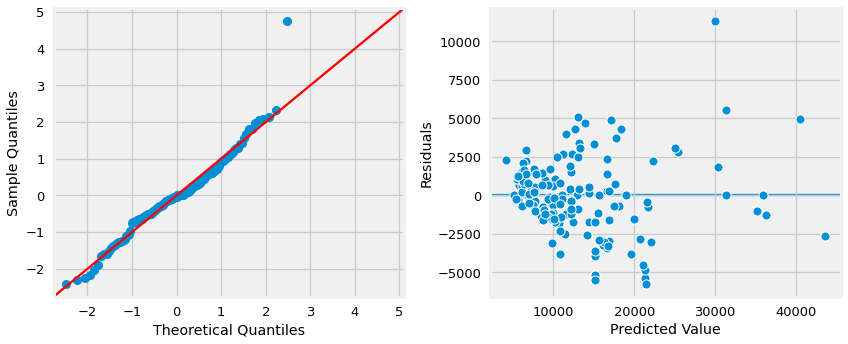

In [21]:
## Fit OLS Model 
model = sm.OLS(y_train,X_train_df)
result = model.fit()
display(result.summary())
evaluate_ols(result,X_train_df, y_train)

### Dropping Bad P-Values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     43.27
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.17e-50
Time:                        19:23:32   Log-Likelihood:                -1410.2
No. Observations:                 153   AIC:                             2874.
Df Residuals:                     126   BIC:                             2956.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
symboling                -2.8797    282.227     -0.010      0.992    -561.398     555.638
wheelbase               231.3908     97.243      2.380      0.019      38.950     423.832
enginesize               64.6512     25.865      2.500      0.014      13.466     115.837
boreratio              -170.0383   2123.709     -0.080      0.936   -4372.797    4032.720
compressionratio        991.3944    583.340      1.700      0.092    -163.017    2145.806
horsepower               79.5504     21.389      3.719      0.000      37.222     121.879
fueltype_diesel       -1.007e+04   5061.514     -1.990      0.049   -2.01e+04     -57.843
fueltype_gas           1073.0075   3284.502      0.327      0.744   -5426.925    7572.940
aspiration_std        -4784.4611   1601.356     -2.988      0.003   -7953.498   -1615.424
aspiration_turbo      -4216.9611   1320.320     -3.194      0.002   -6829.836   -1604.086
doornumber_four       -4753.8285   1529.882     -3.107      0.002   -7781.419   -1726.237
doornumber_two        -4247.5937   1323.096     -3.210      0.002   -6865.963   -1629.225
carbody_convertible    2670.1791   1351.669      1.975      0.050      -4.734    5345.092
carbody_hardtop       -3261.0916   1371.414     -2.378      0.019   -5975.079    -547.104
carbody_hatchback     -3224.6989    820.214     -3.932      0.000   -4847.878   -1601.519
carbody_sedan         -1999.5623    866.494     -2.308      0.023   -3714.329    -284.796
carbody_wagon         -3186.2485   1072.825     -2.970      0.004   -5309.337   -1063.160
drivewheel_4wd        -2192.2048   1098.636     -1.995      0.048   -4366.373     -18.037
drivewheel_fwd        -4006.6417   1019.484     -3.930      0.000   -6024.171   -1989.112
drivewheel_rwd        -2802.5757   1388.612     -2.018      0.046   -5550.598     -54.554
enginelocation_front  -9001.4222   2741.760     -3.283      0.001   -1.44e+04   -3575.561
enginetype_dohc        -605.9577   1358.291     -0.446      0.656   -3293.976    2082.061
enginetype_dohcv      -1.326e+04   4701.490     -2.820      0.006   -2.26e+04   -3951.756
enginetype_l           1748.2991   2132.496      0.820      0.414   -2471.848    5968.446
enginetype_ohc         3510.3426   1263.443      2.778      0.006    1010.025    6010.660
enginetype_ohcf        2877.9076   1578.350      1.823      0.071    -245.600    6001.416
enginetype_ohcv       -3683.8481   1416.535     -2.601      0.010   -6487.128    -880.568
enginetype_rotor        407.6996   1280.980      0.318      0.751   -2127.322    2942.721
cylindernumber_eight   8600.8491   2672.998      3.218      0.002    3311.064    1.39e+04
cylindernumber_five   -2996.9491   1779.027     -1.685      0.095   -6517.591     523.693
cylindernumber_four   -6166.4340   1904.551     -3.238      0.002   -9935.484   -2397.384
cylindernumber_six    -

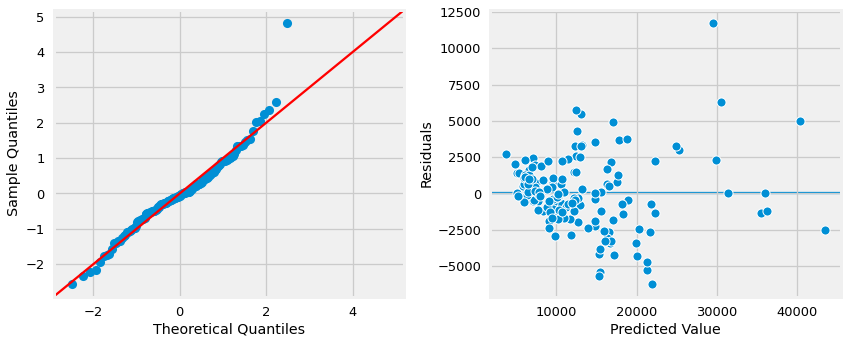

In [22]:
bad_pvals=  ['fuelsystem']

## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price', *drop_cols, *nonlin_cols, *bad_pvals]).copy()

X_train_df,y_train, X_test_df, y_test =get_train_test_data(X,y)

## Fit OLS Model 
model = sm.OLS(y_train,X_train_df)
result = model.fit()
display(result.summary())
evaluate_ols(result,X_train_df, y_train)

### Convert Cylinders to Ordinal

In [23]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [24]:
cyl_map ={'four':4,
          'six':6,
          'five':5,
          'three':3,
          'twelve':12,
          'two':2,
          'eight':8}
df['cylinders'] = df['cylindernumber'].replace(cyl_map)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     44.10
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.32e-48
Time:                        19:23:32   Log-Likelihood:                -1429.8
No. Observations:                 153   AIC:                             2902.
Df Residuals:                     132   BIC:                             2965.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
symboling              290.0643    296.834      0.977      0.330    -297.103     877.232
wheelbase              403.3236     90.654      4.449      0.000     224.001     582.646
enginesize              92.9563     24.125      3.853      0.000      45.234     140.678
boreratio            -2824.2577   2203.370     -1.282      0.202   -7182.742    1534.226
horsepower              38.3049     16.447      2.329      0.021       5.771      70.838
cylinders              665.2636    800.640      0.831      0.408    -918.482    2249.010
aspiration_std       -4960.3267   1570.009     -3.159      0.002   -8065.959   -1854.695
aspiration_turbo     -4266.5529   1610.867     -2.649      0.009   -7453.007   -1080.098
doornumber_four      -4796.1549   1686.201     -2.844      0.005   -8131.628   -1460.682
doornumber_two       -4430.7246   1520.645     -2.914      0.004   -7438.710   -1422.739
carbody_convertible   3430.2307   1490.811      2.301      0.023     481.258    6379.203
carbody_hardtop      -2576.4832   1400.773     -1.839      0.068   -5347.351     194.384
carbody_hatchback    -3677.7906    890.091     -4.132      0.000   -5438.479   -1917.102
carbody_sedan        -2354.3193    966.934     -2.435      0.016   -4267.011    -441.628
carbody_wagon        -4048.5172   1191.585     -3.398      0.001   -6405.589   -1691.445
drivewheel_4wd       -2205.6731   1297.248     -1.700      0.091   -4771.757     360.411
drivewheel_fwd       -4458.7452   1056.898     -4.219      0.000   -6549.394   -2368.097
drivewheel_rwd       -2562.4612   1473.877     -1.739      0.084   -5477.935     353.012
enginelocation_front -9226.8795   3083.563     -2.992      0.003   -1.53e+04   -3127.286
enginetype_dohc      -4241.0650   1031.685     -4.111      0.000   -6281.840   -2200.290
enginetype_dohcv      1411.9958   3643.829      0.388      0.699   -5795.858    8619.849
enginetype_l         -4184.1737   1612.061     -2.596      0.011   -7372.989    -995.358
enginetype_ohc       -1463.2967    821.956     -1.780      0.077   -3089.206     162.613
enginetype_ohcf      -1195.4097   1671.038     -0.715      0.476   -4500.888    2110.069
enginetype_ohcv      -4493.5975   1602.314     -2.804      0.006   -7663.132   -1324.063
enginetype_rotor      4938.6673   2058.752      2.399      0.018     866.253    9011.082
const                -9226.8795   3083.563     -2.992      0.003   -1.53e+04   -3127.286
==============================================================================
Omnibus:                       43.082   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.923
Skew:                           1.074   Prob(JB):                     1.01e-28
Kurtosis:                       6.950   Cond. No.                     1.19e+16
==================

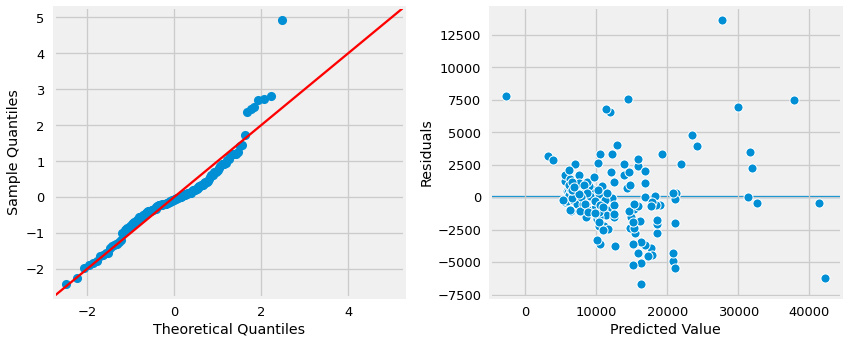

In [25]:
## LIST OF FEATURES BEING DROPPED
drop_cols = ['highwaympg','citympg','carlength','carwidth','curbweight','cylindernumber']
nonlin_cols = ['carheight','stroke','peakrpm']
bad_pvals=  ['fuelsystem','fueltype','compressionratio']

## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price', *drop_cols, *nonlin_cols, *bad_pvals]).copy()

X_train_df,y_train, X_test_df, y_test =get_train_test_data(X,y)

## Fit OLS Model 
model = sm.OLS(y_train,X_train_df)
result = model.fit()
display(result.summary())
evaluate_ols(result,X_train_df, y_train)

## Dropping Bad p_values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     49.14
Date:                Sat, 07 May 2022   Prob (F-statistic):           5.34e-50
Time:                        19:24:13   Log-Likelihood:                -1430.6
No. Observations:                 153   AIC:                             2899.
Df Residuals:                     134   BIC:                             2957.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
wheelbase              374.5460     86.936      4.308      0.000     202.602     546.490
enginesize             109.2892     15.996      6.832      0.000      77.652     140.926
boreratio            -3867.3858   1635.345     -2.365      0.019   -7101.813    -632.959
horsepower              42.0292     15.980      2.630      0.010      10.423      73.635
aspiration_std       -3890.5038   1135.858     -3.425      0.001   -6137.033   -1643.975
aspiration_turbo     -3373.7022   1336.512     -2.524      0.013   -6017.089    -730.315
doornumber_four      -3977.4241   1405.065     -2.831      0.005   -6756.398   -1198.451
doornumber_two       -3286.7819   1079.668     -3.044      0.003   -5422.178   -1151.386
carbody_convertible   4003.3269   1407.771      2.844      0.005    1219.001    6787.653
carbody_hardtop      -2310.8733   1377.267     -1.678      0.096   -5034.868     413.121
carbody_hatchback    -3338.7639    806.562     -4.140      0.000   -4934.002   -1743.526
carbody_sedan        -1916.5515    814.202     -2.354      0.020   -3526.900    -306.203
carbody_wagon        -3701.3443   1082.541     -3.419      0.001   -5842.422   -1560.267
drivewheel_4wd       -1494.4549   1100.714     -1.358      0.177   -3671.475     682.566
drivewheel_fwd       -3810.6624    873.017     -4.365      0.000   -5537.338   -2083.987
drivewheel_rwd       -1959.0887   1277.956     -1.533      0.128   -4486.662     568.485
enginelocation_front -7264.2060   2361.991     -3.075      0.003   -1.19e+04   -2592.600
enginetype_dohc      -4113.2213   1016.418     -4.047      0.000   -6123.519   -2102.924
enginetype_dohcv      2496.1028   3201.399      0.780      0.437   -3835.707    8827.913
enginetype_l         -3980.2139   1583.819     -2.513      0.013   -7112.732    -847.695
enginetype_ohc       -1462.6918    819.852     -1.784      0.077   -3084.217     158.833
enginetype_ohcf       -802.2255   1554.310     -0.516      0.607   -3876.380    2271.929
enginetype_ohcv      -4084.0008   1441.096     -2.834      0.005   -6934.237   -1233.765
enginetype_rotor      4682.0445   1710.532      2.737      0.007    1298.911    8065.178
const                -7264.2060   2361.991     -3.075      0.003   -1.19e+04   -2592.600
==============================================================================
Omnibus:                       38.599   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.287
Skew:                           1.027   Prob(JB):                     1.23e-21
Kurtosis:                       6.299   Cond. No.                     8.08e+33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest 

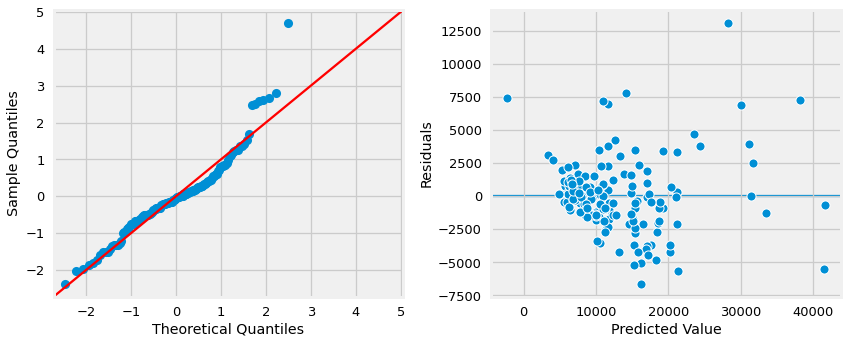

In [27]:
## LIST OF FEATURES BEING DROPPED
drop_cols = ['highwaympg','citympg','carlength','carwidth','curbweight','cylindernumber']
nonlin_cols = ['carheight','stroke','peakrpm']
bad_pvals=  ['fuelsystem','fueltype','compressionratio','cylinders','symboling']

## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price', *drop_cols, *nonlin_cols, *bad_pvals]).copy()

X_train_df,y_train, X_test_df, y_test =get_train_test_data(X,y)

## Fit OLS Model 
model = sm.OLS(y_train,X_train_df)
result = model.fit()
display(result.summary())
evaluate_ols(result,X_train_df, y_train)

### Removing Outliers from Price

In [29]:
from scipy import stats
price_outliers = np.abs(stats.zscore(df['price'])>3)
price_outliers.sum()


df_clean = df.loc[~price_outliers]
df_clean

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cylinders
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,4
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,4
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,6
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,4
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,4
202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,4
203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     49.48
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.05e-49
Time:                        19:26:00   Log-Likelihood:                -1389.0
No. Observations:                 151   AIC:                             2816.
Df Residuals:                     132   BIC:                             2873.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
wheelbase              399.1964     81.356      4.907      0.000     238.267     560.126
enginesize              96.1224     15.587      6.167      0.000      65.290     126.955
boreratio            -4180.5504   1429.266     -2.925      0.004   -7007.780   -1353.321
horsepower              46.9711     14.929      3.146      0.002      17.441      76.502
aspiration_std       -3739.5477   1142.460     -3.273      0.001   -5999.447   -1479.648
aspiration_turbo     -2897.1897   1303.975     -2.222      0.028   -5476.581    -317.799
doornumber_four      -3296.1708   1328.600     -2.481      0.014   -5924.274    -668.068
doornumber_two       -3340.5665   1119.677     -2.984      0.003   -5555.398   -1125.736
carbody_convertible   4018.4722   1111.975      3.614      0.000    1818.876    6218.069
carbody_hardtop      -4200.4502   1143.242     -3.674      0.000   -6461.897   -1939.004
carbody_hatchback    -2169.7867    688.284     -3.152      0.002   -3531.281    -808.293
carbody_sedan        -1543.5822    758.581     -2.035      0.044   -3044.131     -43.033
carbody_wagon        -2741.3906   1017.067     -2.695      0.008   -4753.250    -729.531
drivewheel_4wd       -1952.3504   1024.789     -1.905      0.059   -3979.485      74.784
drivewheel_fwd       -3560.9884    857.238     -4.154      0.000   -5256.690   -1865.287
drivewheel_rwd       -1123.3987   1149.497     -0.977      0.330   -3397.217    1150.419
enginelocation_front -1.055e+04   2140.263     -4.931      0.000   -1.48e+04   -6319.278
enginelocation_rear   3916.1916   1659.292      2.360      0.020     633.949    7198.434
enginetype_dohc      -2338.4718    966.307     -2.420      0.017   -4249.923    -427.021
enginetype_l         -4423.6927   1328.100     -3.331      0.001   -7050.805   -1796.580
enginetype_ohc        -793.9296    599.044     -1.325      0.187   -1978.898     391.039
enginetype_ohcf        -61.0806   1202.287     -0.051      0.960   -2439.324    2317.163
enginetype_ohcv      -3846.6092   1228.403     -3.131      0.002   -6276.512   -1416.706
enginetype_rotor      4827.0465   1642.922      2.938      0.004    1577.185    8076.908
const                -6636.7374   2363.245     -2.808      0.006   -1.13e+04   -1962.005
==============================================================================
Omnibus:                       11.135   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               14.418
Skew:                           0.458   Prob(JB):                     0.000740
Kurtosis:                       4.205   Cond. No.                     9.35e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest 

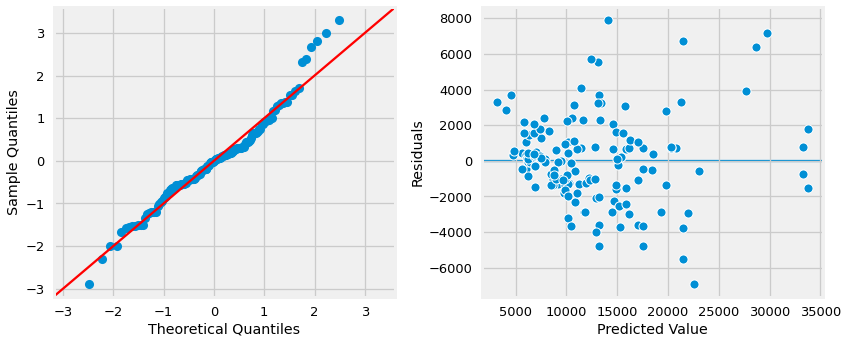

In [30]:
## LIST OF FEATURES BEING DROPPED
drop_cols = ['highwaympg','citympg','carlength','carwidth','curbweight','cylindernumber']
nonlin_cols = ['carheight','stroke','peakrpm']
bad_pvals=  ['fuelsystem','fueltype','compressionratio','cylinders','symboling']

## Make x and y variables
y = df_clean['price'].copy()
X = df_clean.drop(columns=['price', *drop_cols, *nonlin_cols, *bad_pvals]).copy()

X_train_df,y_train, X_test_df, y_test =get_train_test_data(X,y)

## Fit OLS Model 
model = sm.OLS(y_train,X_train_df)
result = model.fit()
display(result.summary())
evaluate_ols(result,X_train_df, y_train)

- Our Final Model better meets the assumptions of normality of residuals and homoscedasticty. 
- The residuals are more of a "blob" than a "cone", which is an improvement. 